Name : Budhaditya Mukhopadhyay (229960)

**TASK 1 : Optimizers**


In this task, you will investigate how different optimizers affect the training behavior.

Pick a architecture of your choice to train on Cifar10.
Train this architecture with different Optimizers and different hyperparameters.
Compare the training curves, e.g. regarding:

steps until convergence
training accuracy (or loss) when converged
stability of training (fluctuation of the curve)
Now choose a different architecture and/or data set and repeat the experiments.
Are the results (qualitatively) still the same? If they are different, discuss potential reasons.

Bonus: Do not only compare visually, but use meaningful quantitative measures for comparison.

# Dataset : CIFAR10

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

170500096/170498071 [==============================] - 11s 0us/step
truck


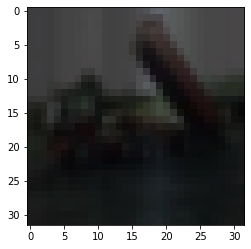

In [ ]:
cifar = tf.keras.datasets.cifar10
#Load Data
(cx_train, cy_train), (cx_test, cy_test) = cifar.load_data()

#Normalize
cx_train = tf.keras.utils.normalize(cx_train, axis=1)
cx_test = tf.keras.utils.normalize(cx_test, axis=1)

#Initialize Class Labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names[cy_train[2,0]])
plt.imshow(cx_train[2])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

## Adam Optimizer



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_adam = model.fit(cx_train,cy_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5479 - accuracy: 0.4454
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0706 - accuracy: 0.6258
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8941 - accuracy: 0.6906
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7868 - accuracy: 0.7296
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7068 - accuracy: 0.7590


In [ ]:
val_loss, val_accuracy = model.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.7163 - accuracy: 0.7552
0.716313362121582 0.716313362121582


## SGD Optimizer

In [ ]:
opt = tf.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_sgd = model.fit(cx_train, cy_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5417 - accuracy: 0.8111
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5348 - accuracy: 0.8150
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5266 - accuracy: 0.8177
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5105 - accuracy: 0.8220
Epoch 5/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5033 - accuracy: 0.8256


In [ ]:
val_loss, val_accuracy = model.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.6328 - accuracy: 0.7908
0.6328158974647522 0.6328158974647522


## Adagrad Optimizer

In [ ]:
opt = tf.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_ada = model.fit(cx_train, cy_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4807 - accuracy: 0.8339
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4756 - accuracy: 0.8339
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4733 - accuracy: 0.8350
Epoch 4/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4644 - accuracy: 0.8383
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4628 - accuracy: 0.8370


In [ ]:
val_loss, val_accuracy = model.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.5658 - accuracy: 0.8119
0.5657978057861328 0.5657978057861328


[1.5478734970092773, 1.0706415176391602, 0.8940686583518982, 0.7867558002471924, 0.7067539095878601]


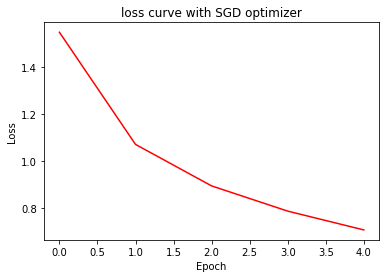

In [ ]:
print(history_adam.history['loss'])
plt.plot(history_adam.history['loss'],'r')
plt.title("loss curve with SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[0.541725218296051, 0.5347989201545715, 0.5266104936599731, 0.5105229020118713, 0.5033491253852844]


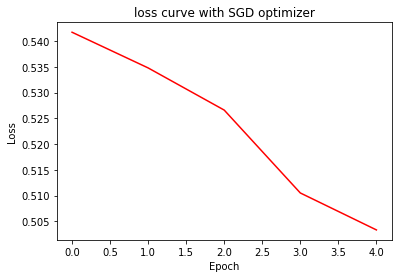

In [ ]:
print(history_sgd.history['loss'])
plt.plot(history_sgd.history['loss'],'r')
plt.title("loss curve with SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[0.48069217801094055, 0.4756016135215759, 0.4732617139816284, 0.46443772315979004, 0.46282294392585754]


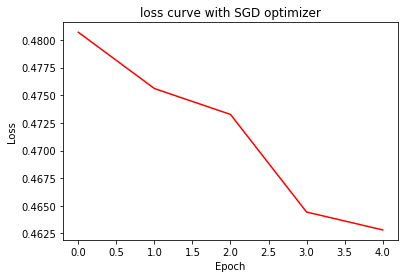

In [ ]:
print(history_ada.history['loss'])
plt.plot(history_ada.history['loss'],'r')
plt.title("loss curve with SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Dataset : MNIST

11493376/11490434 [==============================] - 0s 0us/step
4


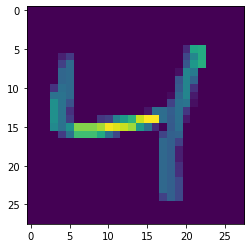

In [ ]:
mnist = tf.keras.datasets.mnist
#Load Data
(cx_train, cy_train), (cx_test, cy_test) = mnist.load_data()

#Normalize
cx_train = tf.keras.utils.normalize(cx_train, axis=1)
cx_test = tf.keras.utils.normalize(cx_test, axis=1)

#Initialize Class Labels
print(cy_train[2])
plt.imshow(cx_train[2])

In [ ]:
model_mnist = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

## Adam Optimizer

In [ ]:
model_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_adam = model_mnist.fit(cx_train,cy_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5479 - accuracy: 0.4454
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0706 - accuracy: 0.6258
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8941 - accuracy: 0.6906
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7868 - accuracy: 0.7296
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7068 - accuracy: 0.7590


In [ ]:
val_loss, val_accuracy = model_mnist.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.7163 - accuracy: 0.7552
0.716313362121582 0.716313362121582


## SGD Optimizer

In [ ]:
opt = tf.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_mnist.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_sgd = model_mnist.fit(cx_train, cy_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5417 - accuracy: 0.8111
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5348 - accuracy: 0.8150
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5266 - accuracy: 0.8177
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5105 - accuracy: 0.8220
Epoch 5/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5033 - accuracy: 0.8256


In [ ]:
val_loss, val_accuracy = model_mnist.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.6328 - accuracy: 0.7908
0.6328158974647522 0.6328158974647522


## Adagrad Optimizer

In [ ]:
opt = tf.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)
model_mnist.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_ada = model_mnist.fit(cx_train, cy_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4807 - accuracy: 0.8339
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4756 - accuracy: 0.8339
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4733 - accuracy: 0.8350
Epoch 4/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4644 - accuracy: 0.8383
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4628 - accuracy: 0.8370


In [ ]:
val_loss, val_accuracy = model_mnist.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.5658 - accuracy: 0.8119
0.5657978057861328 0.5657978057861328


[1.5478734970092773, 1.0706415176391602, 0.8940686583518982, 0.7867558002471924, 0.7067539095878601]


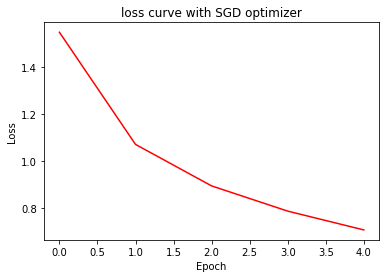

In [ ]:
print(history_adam.history['loss'])
plt.plot(history_adam.history['loss'],'r')
plt.title("loss curve with SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[0.541725218296051, 0.5347989201545715, 0.5266104936599731, 0.5105229020118713, 0.5033491253852844]


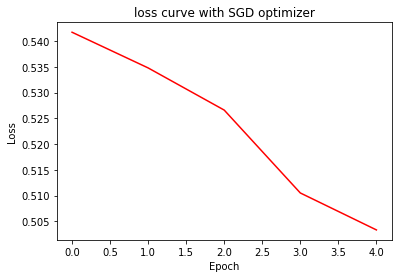

In [ ]:
print(history_sgd.history['loss'])
plt.plot(history_sgd.history['loss'],'r')
plt.title("loss curve with SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[0.48069217801094055, 0.4756016135215759, 0.4732617139816284, 0.46443772315979004, 0.46282294392585754]


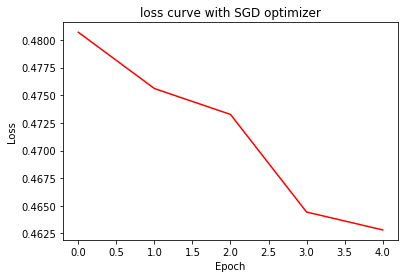

In [ ]:
print(history_ada.history['loss'])
plt.plot(history_ada.history['loss'],'r')
plt.title("loss curve with SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Observation - 



For CIFAR10 dataset using 5 Epochs we can see that Adagrad performs much better that Adam anad SGD. With adagrad we are getting 81% test accuracy. 
<br>
<br>
For MNIST dataset using the same model and 5 Ephocs we can again see that the adagrad is performing much better than the other two optimizers. Adagrad acheving an accuracy of 81% where others are 75% and 71%.
<br>
<br>
Adagrad Optimizer 
*   learning_rate=0.001
*   initial_accumulator_value=0.1, epsilon=1e-07
*   epsilon=1e-07
<br>
<br>
Stochastic Gradient Descent(SGD) Optimizer 
*   learning_rate=0.001
*   momentum=0.9




